<a href="https://colab.research.google.com/github/mohdsaad379/TensorFlowProject/blob/main/augmented_CATvDOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [2]:
# This code block unzips the full Cats-v-Dogs dataset to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

!ls "/content/drive/My Drive/cat classifier"
path_cats_and_dogs='/content/drive/My Drive/cat classifier/cats-and-dogs.zip'
local_zip = path_cats_and_dogs
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

Mounted at /content/drive
cats-and-dogs.zip


In [3]:
print(os.getcwd())

/content


In [4]:
print(len(os.listdir('/content/cats-and-dogs/training/cats/')))
print(len(os.listdir('/content/cats-and-dogs/training/dogs/')))

# Expected Output:
# 1500
# 1500

4001
4006


In [5]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
    #YOUR CODE GOES HERE
    os.chdir('/content')
    os.mkdir('/content/cats-v-dogs')
    os.mkdir('/content/cats-v-dogs/training')
    os.mkdir('/content/cats-v-dogs/training/cats/')
    os.mkdir('/content/cats-v-dogs/training/dogs/')
    print("saad")
    os.mkdir('/content/cats-v-dogs/testing')
    os.mkdir('/content/cats-v-dogs/testing/cats/')
    os.mkdir('/content/cats-v-dogs/testing/dogs/')
    print(os.listdir())
    os.chdir('/content/cats-v-dogs')
    print(os.listdir())
except OSError:
    pass

saad
['.config', 'cats-v-dogs', 'cats-and-dogs', 'drive', 'sample_data']
['training', 'testing']


In [6]:
# # Write a python function called split_data which takes
# # a SOURCE directory containing the files
# # a TRAINING directory that a portion of the files will be copied to
# # a TESTING directory that a portion of the files will be copie to
# # a SPLIT SIZE to determine the portion
# # The files should also be randomized, so that the training set is a random
# # X% of the files, and the test set is the remaining files
# # SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# # Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# # and 10% of the images will be copied to the TESTING dir
# # Also -- All images should be checked, and if they have a zero file length,
# # they will not be copied over
# #
# # os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# # os.path.getsize(PATH) gives you the size of the file
# # copyfile(source, destination) copies a file from source to destination
# # random.sample(list, len(list)) shuffles a list
# def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
#     files=[]
#     for file in os.listdir(SOURCE):
#         PATH=os.path.join(SOURCE,file)
#         #print(PATH)
#         if(os.path.getsize(PATH)>0):
#             files.append(file)
#         else:
#             print("Sorry length is 0")
#     random.sample(files,len(files))
#     training_size=len(files)*SPLIT_SIZE
#     testing_size=len(files)-training_size
#     print(training_size,testing_size)
#     for i in files[0:int(training_size)]:
#         copyfile(os.path.join(SOURCE,i),os.path.join(TRAINING,i))
#     for i in files[int(training_size):]:
#         copyfile(os.path.join(SOURCE,i),os.path.join(TESTING,i))    
    
# # YOUR CODE STARTS HERE
# # YOUR CODE ENDS HERE


# CAT_SOURCE_DIR = "/content/training_set/training_set/cats"
# TRAINING_CATS_DIR = "/content/cats-v-dogs/training/cats/"
# TESTING_CATS_DIR = "/content/cats-v-dogs/testing/cats/"
# DOG_SOURCE_DIR = "/content/training_set/training_set/dogs"
# TRAINING_DOGS_DIR = "/content/cats-v-dogs/training/dogs/"
# TESTING_DOGS_DIR = "/content/cats-v-dogs/testing/dogs/"

# split_size = 1
# split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
# split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

In [7]:
print(len(os.listdir('/content/cats-and-dogs/training/cats/')))
print(len(os.listdir('/content/cats-and-dogs/training/dogs/')))
print(len(os.listdir('/content/cats-and-dogs/testing/cats/')))
print(len(os.listdir('/content/cats-and-dogs/testing/dogs/')))

# Expected output:
# 1350
# 1350
# 150
# 150

4001
4006
1012
1013


In [28]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# NOTE:

In the cell below you **MUST** use a batch size of 10 (`batch_size=10`) for the `train_generator` and the `validation_generator`. Using a batch size greater than 10 will exceed memory limits on the Coursera platform.

In [29]:
TRAINING_DIR = '/content/cats-and-dogs/training/'
train_datagen = ImageDataGenerator(
    # rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=200,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

VALIDATION_DIR = '/content/cats-and-dogs/testing'
validation_datagen = ImageDataGenerator(rescale=1./255)

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')


# Expected Output:
# Found 2700 images belonging to 2 classes.
# Found 300 images belonging to 2 classes.

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [30]:
history = model.fit_generator(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
41/41 [==============================] - 167s 4s/step - loss: 82.2136 - acc: 0.5309 - val_loss: 0.6930 - val_acc: 0.4998
Epoch 2/30
41/41 [==============================] - 168s 4s/step - loss: 0.8247 - acc: 0.5643 - val_loss: 0.6934 - val_acc: 0.4998
Epoch 3/30
41/41 [==============================] - 167s 4s/step - loss: 1.0863 - acc: 0.5398 - val_loss: 0.6963 - val_acc: 0.4998
Epoch 4/30
41/41 [==============================] - 166s 4s/step - loss: 1.0355 - acc: 0.5530 - val_loss: 0.6931 - val_acc: 0.4998
Epoch 5/30
41/41 [==============================] - 167s 4s/step - loss: 0.9232 - acc: 0.5462 - val_loss: 0.6935 - val_acc: 0.4998
Epoch 6/30
41/41 [==============================] - 168s 4s/step - loss: 0.6953 - acc: 0.5724 - val_loss: 0.6946 - val_acc: 0.4998
Epoch 7/30
41/41 [==============================] - 167s 4s/step - loss: 0.7046 - acc: 0.5814 - val_loss: 0.6945 - val_acc: 0.4998
Epoch 8/30
41/41 [==============================] - 168s 4s/step - loss: 0.6757 - 

Text(0.5, 1.0, 'Training and validation loss')

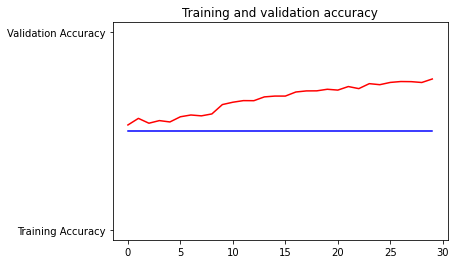

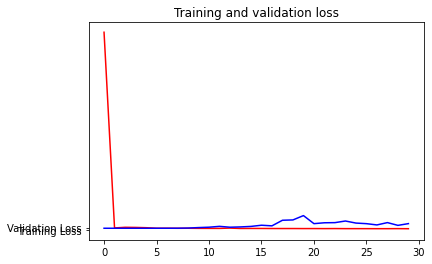

In [31]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)


**testing the model**



(300, 300)
(300, 300, 3)
(300, 300, 3)
270000
[[0.09113341]]
[0.09113341]
/content/cats-and-dogs/testing/cats/cat.4005.jpg is a cat.


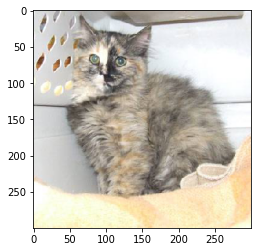

In [36]:

import numpy as np
from google.colab import files
from keras.preprocessing import image

 
# predicting images
path = '/content/cats-and-dogs/testing/cats/' + 'cat.4005.jpg'
fn=path
img = image.load_img(path, target_size=(300,300))
print(img.size)
plt.imshow(img)
x = image.img_to_array(img)
print(x.shape)
# x=x.reshape(-1,150,150,3)
print(x.shape)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
print(images.size)
classes = model.predict(x, batch_size=10)
print(classes)
print(classes[0])
if classes[0]>0.5:
  print(fn + " is a dog.")
else:
  print(fn + " is a cat.")

In [37]:
model.save('catVsDog.h5')